In [118]:
import altair as alt
import pandas as pd
from vega_datasets import data
from altair import pipe, limit_rows, to_values,VgTitleConfig
import altair as alt
alt.renderers.enable('notebook')

import numpy as np
t = lambda data: pipe(data, limit_rows(max_rows=50000), to_values)
alt.data_transformers.register('custom', t)
alt.data_transformers.enable('custom')

inputfile='distribution_sum_access'
from IPython.display import HTML





In [119]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [120]:

def get_spaced_colors(n):
    max_value = 16581375 #255**3
    interval = int(max_value / n)
    colors = [hex(I)[2:].zfill(6) for I in range(0, max_value, interval)]
    return ['#'+i for i in colors]

def generate_scatter_plot(dataframe,colors,topic):
    df2=dataframe.loc[df['topic'] == topic]
    pointer = alt.selection_single(on='mouseover', nearest=True, empty='none')
    if max(df2['total citations']>2000000):
        base=alt.Chart().encode(
            y=alt.Y('total citations',axis=alt.Axis(grid=True),scale=alt.Scale(type='log')),
            x=alt.X('percentage open citations', axis=alt.Axis(title='percentage of open citations')),
        ).properties(
        width=800, 
        height=600
    )
    else:
        base=alt.Chart().encode(
            y=alt.Y('total citations',axis=alt.Axis(grid=True)),
            x=alt.X('percentage open citations', axis=alt.Axis(title='percentage of open citations')),
        ).properties(
        width=800, 
        height=600
    )
    base.mark_text(dx=0, align='left',size=20).encode(text='wiki')
    chart = alt.layer(
        base.mark_circle(size=70, strokeWidth=1,stroke='black').properties(selection=pointer).encode(color='wiki'),
        base.mark_text(dx=5, align='left',size=20).encode(text=alt.condition(pointer, 'wiki', alt.value('   '))),
        data=df2
    ).configure_axis(labelFontSize=16, titleFontSize=20).configure_legend(offset=20 ,cornerRadius=500).interactive()
    return chart


In [121]:
df = pd.DataFrame.from_csv(inputfile,sep='\t',  index_col=None)

wikis = list(np.sort(list(set(df['wiki'].tolist()))))
cols=get_spaced_colors(len(wikis))

Select which topics we are using

In [122]:
topics = np.sort(list(set(df['topic'].tolist())))
topics

array(['Africa', 'Americas', 'Article improvement and grading', 'Arts',
       'Biology', 'Bodies of water', 'Broadcasting',
       'Business and economics', 'Chemistry', 'Cities', 'Contents systems',
       'Countries', 'Crafts and hobbies', 'Economics', 'Education',
       'Entertainment', 'Europe', 'Files', 'Food and drink', 'Geosciences',
       'History and society', 'Information science', 'Internet culture',
       'Landforms', 'Language and literature', 'Maintenance', 'Maps',
       'Mathematics', 'Media', 'Medicine', 'Meteorology',
       'Military and warfare', 'Music', 'Performing arts',
       'Philosophy and religion', 'Physics', 'Plastic arts',
       'Politics and government', 'Science', 'Space', 'Sports',
       'Technology', 'Time', 'Transportation', 'all_topics'], 
      dtype='|S31')

Then generate graph

In [123]:

chart=generate_scatter_plot(df,cols,'Space')



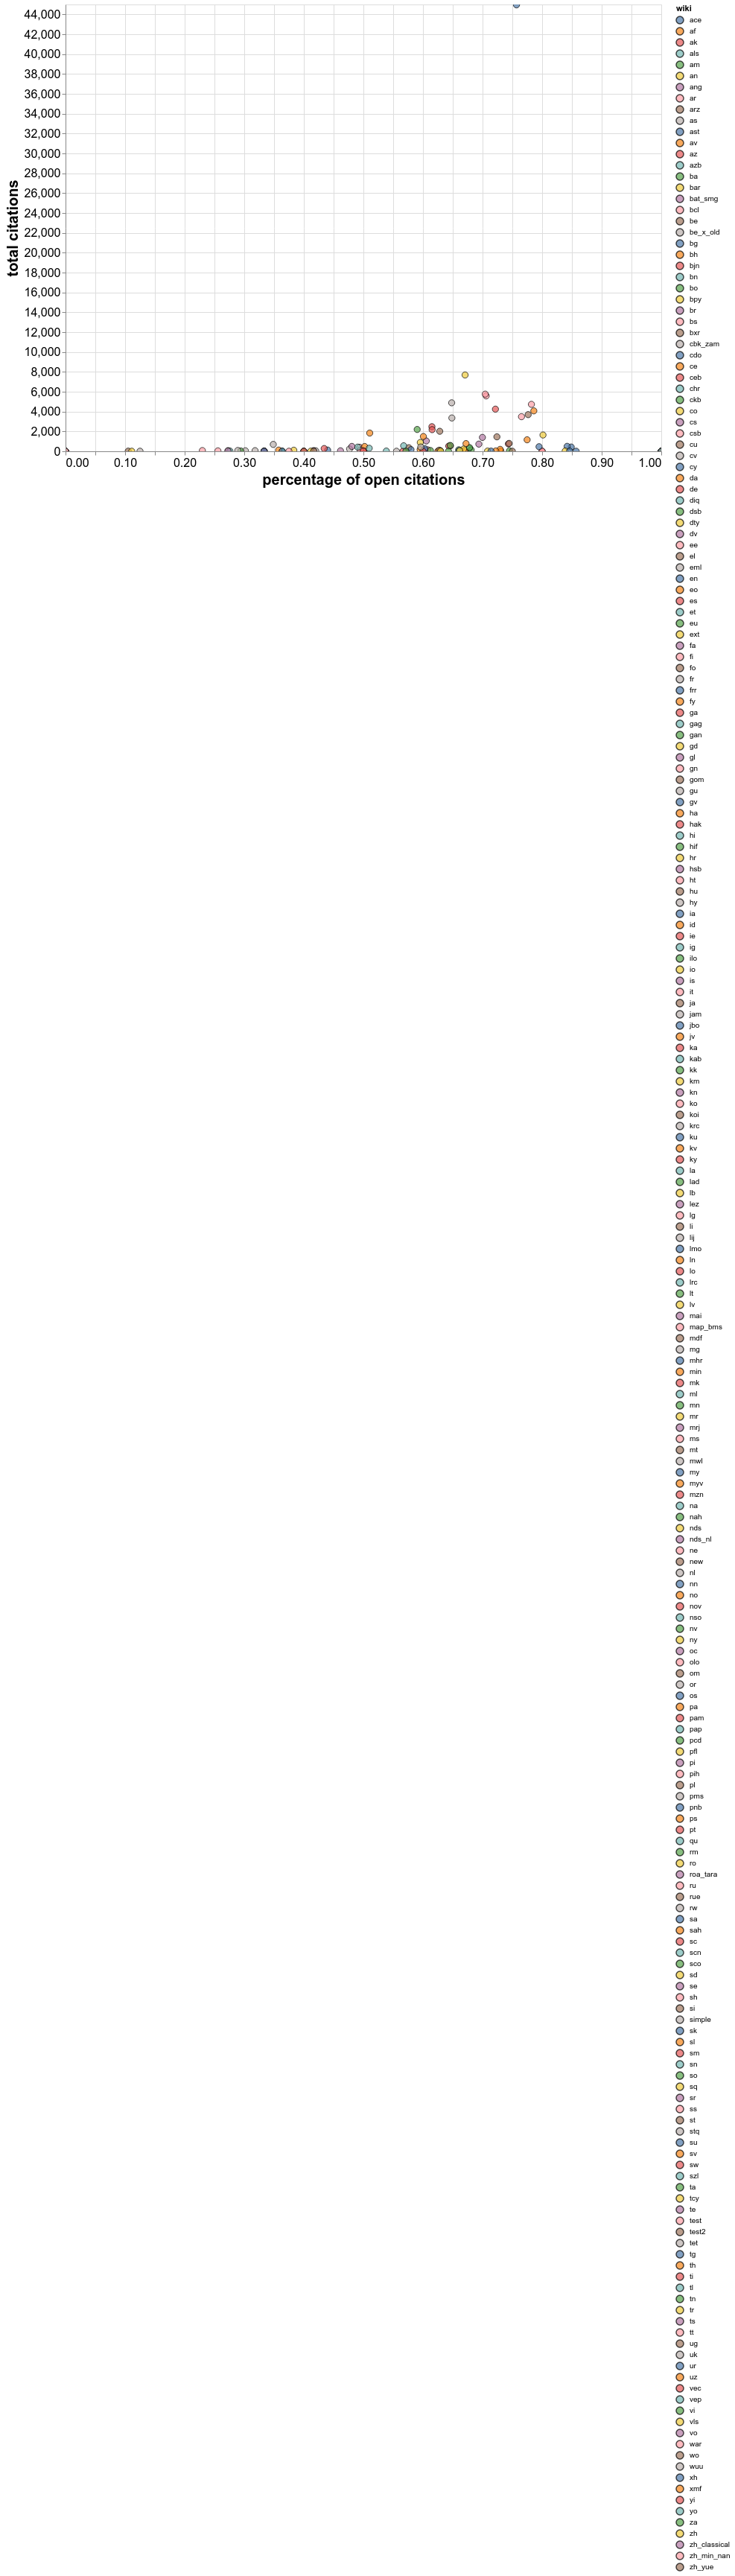

In [117]:
chart